<a href="https://colab.research.google.com/github/rudrat04/YouTube/blob/main/Pycaret/PyCaret_Hands_On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.4 MB/s 

In [ ]:
# Get the data
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data1 = data.copy()

In [ ]:
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(data = data1, target = 'charges', remove_outliers=True, remove_multicollinearity=True, train_size = 0.8,
        transformation = True, numeric_imputation = 'knn', categorical_imputation = 'mode')
s.compare_models()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Description,Value
0,Session id,1097
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1284, 10)"
5,Transformed train set shape,"(1016, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2636.0506,22349185.4558,4655.5865,0.8546,0.4252,0.2907,0.4210
lightgbm,Light Gradient Boosting Machine,2949.8949,24450293.3836,4880.2525,0.8405,0.5334,0.3561,0.7780
rf,Random Forest Regressor,2843.2337,25220980.6639,4966.1740,0.8354,0.4616,0.3288,0.7200
et,Extra Trees Regressor,2896.1518,28618015.7488,5297.4872,0.8130,0.4734,0.3197,0.6220
ada,AdaBoost Regressor,4359.6166,29036421.7147,5356.7365,0.8094,0.6145,0.7125,0.4170
xgboost,Extreme Gradient Boosting,3301.1346,29796924.4000,5410.7506,0.8054,0.5708,0.4155,0.5080
llar,Lasso Least Angle Regression,4074.1208,37499790.3062,6070.2562,0.7558,0.4896,0.3793,0.3580
br,Bayesian Ridge,4077.9472,37498589.3704,6070.2720,0.7558,0.4890,0.3799,0.3610
lr,Linear Regression,4069.3208,37496085.4344,6069.8703,0.7558,0.4903,0.3785,0.9710
lar,Least Angle Regression,4069.3208,37496085.4344,6069.8703,0.7558,0.4903,0.3785,0.3500


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=1097)

In [ ]:
model = s.create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3099.1966,26596333.0737,5157.1633,0.8112,0.5087,0.3822
1,3255.8281,39855969.7307,6313.1585,0.7805,0.4576,0.2435
2,2398.0620,20337244.1749,4509.6834,0.8562,0.4638,0.2401
3,2862.8404,25103633.0977,5010.3526,0.8315,0.4120,0.3251
4,2477.6939,19095599.0578,4369.8511,0.8903,0.3781,0.2616
5,1957.1676,9682958.4361,3111.7452,0.9328,0.3641,0.2584
6,2627.2438,23341398.4293,4831.2937,0.8404,0.4816,0.2950
7,2261.0906,15517680.4071,3939.2487,0.8865,0.3770,0.2987
8,3017.2891,27045909.3468,5200.5682,0.8254,0.4390,0.3498


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
s.tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3211.8787,27860468.0319,5278.3016,0.8022,0.5578,0.3745
1,3920.0205,44435794.2304,6666.0179,0.7553,0.5963,0.3515
2,2817.5511,23510007.8706,4848.7120,0.8338,0.5156,0.2792
3,3190.5345,28578189.9271,5345.8573,0.8081,0.4173,0.3113
4,3093.3385,23345675.3075,4831.7363,0.8659,0.4382,0.3503
5,2412.3157,11627517.6365,3409.9146,0.9193,0.5215,0.4162
6,3226.9976,28643684.2771,5351.9795,0.8042,0.8789,0.4037
7,2792.0059,19401808.6447,4404.7484,0.8581,0.6420,0.3829
8,3031.3946,27132370.7751,5208.8742,0.8248,0.4794,0.3748


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


GradientBoostingRegressor(random_state=1097)

In [ ]:
s.evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

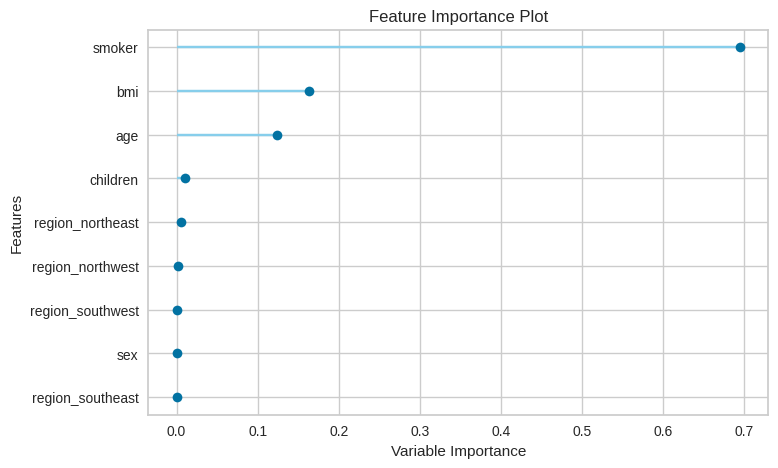

In [ ]:
s.plot_model(model,'feature')

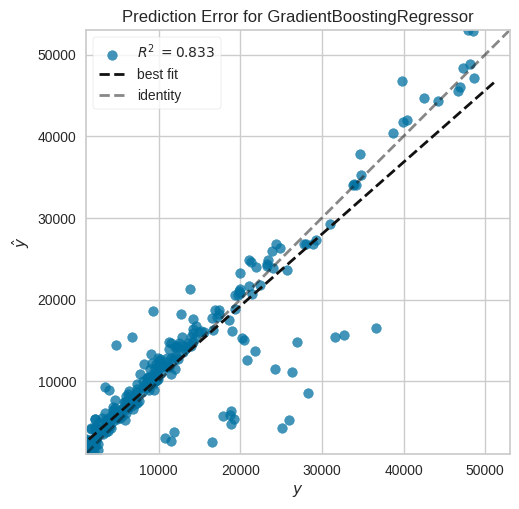

In [ ]:
s.plot_model(model, 'error')

In [ ]:
s.predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2434.8844,19562950.6960,4423.0025,0.8335,0.4254,0.2835


,age,sex,bmi,children,smoker,region,charges,prediction_label
752,64,male,37.904999,0,no,northwest,14210.536133,16383.610586
810,46,female,30.799999,3,no,southwest,9414.919922,8946.932160
808,18,male,30.139999,0,no,southeast,1131.506592,2790.005587
1307,32,male,28.120001,4,yes,northwest,21472.478516,20634.322847
139,22,female,36.000000,0,no,southwest,2166.731934,2022.547670
...,...,...,...,...,...,...,...,...
530,57,male,42.130001,1,yes,southeast,48675.519531,47092.130680
699,23,female,39.270000,2,no,southeast,3500.612305,6133.496432
106,19,female,28.400000,1,no,southwest,2331.519043,3893.619998
59,34,female,37.334999,2,no,northwest,5989.523438,8186.904344


In [ ]:
s.save_model(model, 'gbr_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=KNNImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transformer...
                                                               use_cat_names=True))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('remove_outliers',
                  TransformerWrapper(transformer=RemoveOutliers(random_state=1097))),
                 ('transfor

In [ ]:
loaded_model = s.load_model('gbr_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
loaded_model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=KNNImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],...
                                                              use_cat_names=True))),
                ('remove_multicollinearity',
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('remove_outliers',
                 TransformerWrapper(transformer=RemoveOutliers(random_state=1097))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('trained_model',
                 GradientBoostingRegressor(random_state=1097))])

In [ ]:
data1 = data.copy()
data1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
loaded_model.fit(data1, data['charges'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=KNNImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],...
                                                              use_cat_names=True))),
                ('remove_multicollinearity',
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('remove_outliers',
                 TransformerWrapper(transformer=RemoveOutliers(random_state=1097))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('trained_model',
                 GradientBoostingRegressor(random_state=1097))])

In [ ]:
loaded_model.predict(data1)

array([17066.62085911,  1736.17411089,  4432.59126542, ...,
        1635.29879511,  2014.44110116, 29193.6964156 ])